# TP - Intelligence artificielle pour la santé
# Convolutions

Gilles Cohen | gilles.cohen@univ.lyon1.fr

M2 - UCBL Université Lyon.



Objectifs:
- Application de convolution sur images

# Nom étudiant:  DORIVAL

# Prénom étudiant: Pierre Chrislin

## Instruction de soumission
1.  L'étudiant doit insérer le code Python où c'est demandé TODO .

2.  Préfixer ce fichier notebook avec nom_prenom_

3.  Insérez votre nom et prénom dans la cellule suivante.

### Lecture et visualisation d'images

Le code suivant permet de lire une image, de la placer dans un tableau numpy et de l'afficher dans le notebook.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize

sample image shape:  (600, 600, 3)


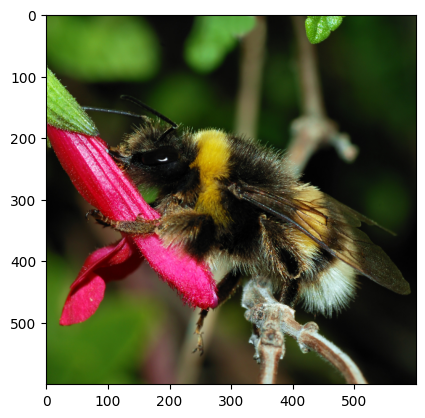

In [6]:
sample_image = imread("bumblebee.png")
sample_image= sample_image.astype("float32")

size = sample_image.shape
print("sample image shape: ", sample_image.shape)

plt.imshow(sample_image.astype('uint8'));

### Un filftre de convolution simple

Le but de cette section est d'utiliser tensorflow / Keras pour effectuer des convolutions individuelles sur des images. Cette section n'implique pas encore l'apprentissage d'un modèle.

In [13]:

import tensorflow as tf
print(tf.__version__)



2.18.0


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [19]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
              input_shape=(None, None, 3))

Rappelez-vous : dans Keras, `None` est utilisé comme marqueur pour les dimensions de tenseur avec une taille dynamique. Dans ce cas, `batch_size`, `width` et `height` sont tous dynamiques : ils peuvent dépendre de l'entrée. Seul le nombre de canaux d'entrée (3 couleurs) a été fixé.

In [20]:
sample_image.shape

(600, 600, 3)

In [21]:
img_in = np.expand_dims(sample_image, 0)
img_in.shape

(1, 600, 600, 3)

**Questions**: 


Si on applique cette convolution à cette image, quelle sera la forme de la carte de caractéristiques générée ?

Indications :

- dans Keras, `padding="same"` signifie que les convolutions utilisent autant de padding que nécessaire afin de préserver la dimension spatiale des cartes ou images d'entrée ;

- dans Keras, les convolutions n'ont pas de strides par défaut.

Bonus : quelle quantité de padding Keras doit-il utiliser pour préserver les dimensions spatiales dans ce cas particulier ?

In [8]:
img_out = conv(img_in)
print(type(img_out), img_out.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 600, 600, 3)


La sortie est un tensorflow Eager Tensor, qui peut être converti pour obtenir un tableau numpy standard :

In [9]:
np_img_out = img_out[0].numpy()
print(type(np_img_out))

<class 'numpy.ndarray'>


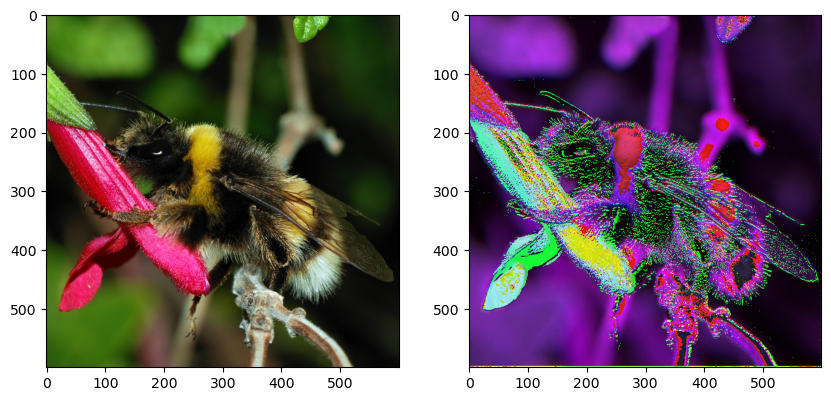

In [10]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(np_img_out.astype('uint8'));

La sortie a 3 canaux, et peut donc être interprétée comme une image RGB avec matplotlib. Cependant, il s'agit du résultat d'un filtre convolutionnel aléatoire appliqué à l'image originale.


Examinons les paramètres :

In [11]:
conv.count_params()

228

**Question**: Peut-on calculer le nombre de paramètres entraînables à partir des hyperparamètres de la couche ?

Indices :

- l'image d'entrée a 3 couleurs et un seul **noyau de convolution** mélange les informations des trois canaux d'entrée pour calculer sa sortie ;

- une **couche de convolution** produit plusieurs canaux à la fois : chaque canal est la sortie d'une opération de convolution distincte (également appelée unité) de la couche ;

- n'oubliez pas les biais !

Solution : introspecter le modèle keras :

In [12]:
len(conv.get_weights())

2

In [13]:
weights = conv.get_weights()[0]
weights.shape

(5, 5, 3, 3)

Chacun des trois canaux de sortie est généré par un noyau de convolution distinct.

Chaque noyau de convolution a une taille spatiale de 5x5 et fonctionne sur 3 canaux d'entrée.

In [14]:
biases = conv.get_weights()[1]
biases.shape

(3,)

Un biais par canal de sortie.

On peut aussi construire un noyau en définissant une fonction qui sera passée à la couche `Conv2D`.
On va créer un tableau avec 1/25 pour les filtres, avec chaque canal séparé. 

In [15]:
def my_init(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

On peut afficher les filtres numpy en déplaçant les dimensions spatiales à la fin (en utilisant `np.transpose`) :

In [16]:
np.transpose(my_init(), (2, 3, 0, 1))

array([[[[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]]],


       [[[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
      

In [17]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_init)

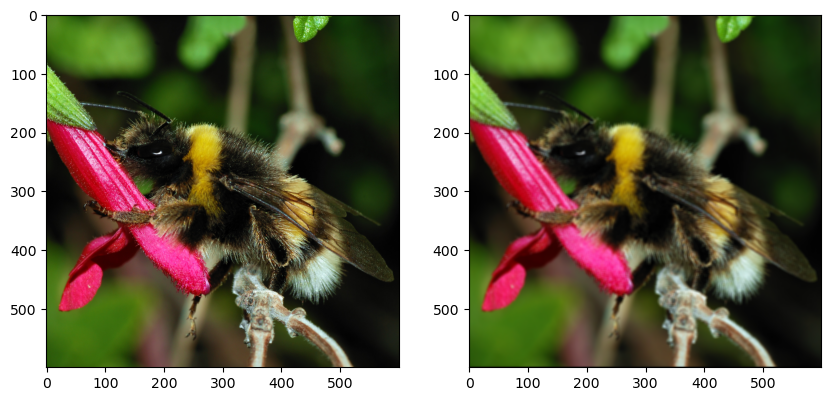

In [18]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))

img_out = conv(img_in)
np_img_out = img_out[0].numpy()
ax1.imshow(np_img_out.astype('uint8'));

**Exercice**
- Définir une couche Conv2D avec 3 filtres (5x5) qui calculent la fonction d'identité (préserver l'image d'entrée sans mélanger les couleurs).
- Changez le stride à 2. Quelle est la taille de l'image de sortie ?
- Modifiez le padding pour qu'il soit égal à "VALID". Qu'observez-vous ?

### Travail sur la détection des contours d'une image en niveaux de gris

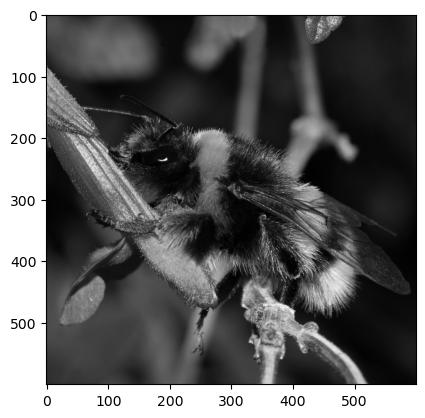

In [19]:
# convertir image en niveaux de gris
grey_sample_image = sample_image.mean(axis=2)

# ajouter la dimension du canal même s'il n'y a qu'un seul canal donc
# pour être cohérent avec les attentes de Keras.
grey_sample_image = grey_sample_image[:, :, np.newaxis]


# matplotlib n'aime pas le dim supplémentaire pour le canal de couleur
# lors du tracé d'images en niveaux de gris. Utiliser squeeze:
plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray);

**Exercice**
- Construire un détecteur d'arêtes en utilisant `Conv2D` sur une image en niveaux de gris
- Vous pouvez expérimenter avec plusieurs noyaux pour trouver un moyen de détecter les bords.
- https://en.wikipedia.org/wiki/Kernel_(image_processing)

Essayez `Conv2D?` ou appuyez sur `shift-tab` pour obtenir la documentation. Vous pouvez obtenir de l'aide à l'adresse suivante : https://keras.io/layers/convolutional/

### Pooling et strides avec convolutions

**Exercice**
- Utilisez `MaxPool2D` pour appliquer un pool 2x2 max avec strides 2 à l'image. Quel est l'impact sur la forme de l'image ?
- Utilisez `AvgPool2D` pour appliquer un pooling moyen.
- Est-il possible de calculer un pooling max et un pooling moyen avec des noyaux bien choisis ?

**Bonus**
- Implémenter un pooling moyen 3x3 avec une convolution régulière `Conv2D`, avec des strides, un noyau et un padding bien choisis.

In [23]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D